# TD 4A : Machine Learning et Marketting

Le jeu de données [Bank Marketing Data Set ](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) contient des données destinées à évaluer le fait qu'une personne souscrive un contrat. La base de données contient 45.000 observations avec 17 attributs et une variable binaire qui représente le résultat à prédire.

Tout d'abord, on récupère la base de données.

In [1]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/"
file = "bank.zip"
import pyensae
data = pyensae.download_data(file, website=url)

    downloading of  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip  to  bank.zip
    unzipped 

 bank-full.csv  to  .\bank-full.csv
    unzipped  bank-names.txt  to  .\bank-names.txt
    unzipped  bank.csv  to  .\bank.csv


In [2]:
with open("bank.csv","r") as fo :
    n = 0
    for row in fo :
        print(row.strip("\r\n "))
        n += 1
        if n > 5 : break

"age";"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"
33;"services";"married";"secondary";"no";4789;"yes";"yes";"cellular";11;"may";220;1;339;4;"failure";"no"
35;"management";"single";"tertiary";"no";1350;"yes";"no";"cellular";16;"apr";185;1;330;1;"failure";"no"
30;"management";"married";"tertiary";"no";1476;"yes";"yes";"unknown";3;"jun";199;4;-1;0;"unknown";"no"
59;"blue-collar";"married";"secondary";"no";0;"yes";"no";"unknown";5;"may";226;1;-1;0;"unknown";"no"


In [3]:
import pandas
df = pandas.read_csv("bank.csv",sep=";")
df.tail()

age            job  marital  education default  balance housing loan  \
4516   33       services  married  secondary      no     -333     yes   no   
4517   57  self-employed  married   tertiary     yes    -3313     yes  yes   
4518   57     technician  married  secondary      no      295      no   no   
4519   28    blue-collar  married  secondary      no     1137      no   no   
4520   44   entrepreneur   single   tertiary      no     1136     yes  yes   

       contact  day month  duration  campaign  pdays  previous poutcome   y  
4516  cellular   30   jul       329         5     -1         0  unknown  no  
4517   unknown    9   may       153         1     -1         0  unknown  no  
4518  cellular   19   aug       151        11     -1         0  unknown  no  
4519  cellular    6   feb       129         4    211         3    other  no  
4520  cellular    3   apr       345         2    249         7    other  no

Plan

* [Exercice 1 : prédire y en fonction des attributs](#exo1)
* [Exercice 2 : tracer la courbe ROC](#exo2)
* [Exercice 3 : d3js](#exo3)

<h3 id="exo1">Exercice 1 : prédire y en fonction des attributs</h3>

On utilisera pour cela un [GradientBoostingClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) après avoir sciender la base en base d'apprentissage et tests. Quelques liens :

* [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)
* [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html)
* [Using DictVectorizer with sklearn DecisionTreeClassifier](http://stackoverflow.com/questions/15181311/using-dictvectorizer-with-sklearn-decisiontreeclassifier)
* [iterrows](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iterrows.html)

<h3 id="exo2">Exercice 2 : tracer la courbe ROC</h3>

La plupart des classifieur produisent deux chiffres en sorties : la classe et un score. Le score est souvent une probabilité et il traduit la qualité du classifieur. On s'en sert alors pour accepter ou rejeter la prédiction [Sensitivity and specificity](http://en.wikipedia.org/wiki/Sensitivity_and_specificity). La dénomination ``vrai positif``, ``faux positif``, ... est assez trompeuse. Il vaut mieux retenir les définitions de [précision, rappel](http://fr.wikipedia.org/wiki/Pr%C3%A9cision_et_rappel).

Comme le classifieur retourne un score de confiance, on décide de valider ou de rejeter sa réponse si le score est supérieur ou inférieur à ce seuil :

* si score >= seuil, on valide la réponse, qui est soit bonne (TP : True Positive), soit fausse (FP : False Positive)
* si score < seuil, on rejete la réponse qui est soit bonne (FN : False Negative) soit fausse (True Negative)

La présicion est définie comme étant le nombre de réponses justes sur le nombre de réponses validées :

$$precision = \frac{TP}{TP + FP}$$

Le rappel est défini comme étant le nombre de réponses justes sur le nombre total de réponses justes :


$$rappel = \frac{TP}{TP + FN}$$

Dans notre cas, on définit une réponse juste comme étant le fait qu'on prédit la bonne classe. Quelques liens :

* [Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/plot_roc.html)

Et il faudra tracer sur le même dessin la courbe ROC de :

* l'ensemble de la base de test
* deux échantillons aléatoires de la base de test

Les courbes des deux échantillons aléatoires devraient illustrer la stabilité de la courbe ROC. Il est même possible de calculer un intervalle de confiance en utilisant un [bootstrap](http://fr.wikipedia.org/wiki/Bootstrap_%28statistiques%29).

Quelques liens sur matplotlib :
* [Our Favorite Recipes](http://matplotlib.org/users/recipes.html)
* [How to make several plots on a single page using matplotlib?](http://stackoverflow.com/questions/1358977/how-to-make-several-plots-on-a-single-page-using-matplotlib)

<h3 id="exo3">Exercice 3 : d3js</h3>

**Préliminaire**

Les graphiques interactifs sont écrits en javascript tout comme les notebooks IPython. Il est difficile d'avoir les deux ensembles. Par défaut, les graphiques ne sont pas interactifs en Python. La conversion automatique des notebooks n'est pas parfaite. Il faudra attendre encore un peu de temps avant que ces outils ne soient aisément utilisables.

**javascript**

La librairie [d3.js](http://d3js.org/) est la librairie la plus connue pour faire des graphiques interactifs. Elle est écrite en [javascript](http://fr.wikipedia.org/wiki/JavaScript). Néanmoins, sans trop connaître le langage, il est possible de s'en servir pour faire un graphique dans un notebook. Le plus souvent, on récupère le code javascript d'un graphique, on change les données et on l'affiche. On va s'inspirer des liens suivants :

* Solution 1 : [mpld3](http://mpld3.github.io/), [seaborn](http://stanford.edu/~mwaskom/software/seaborn/), ...
    * [D3 Plugins: Truly Interactive Matplotlib In Your Browser](http://jakevdp.github.io/blog/2014/01/10/d3-plugins-truly-interactive/)
    * [21 Interactive Plots from matplotlib, ggplot for Python, prettyplotlib, Stack Overflow, and seaborn](http://nbviewer.ipython.org/gist/msund/11349097) (le notebook utilise [plot.ly](https://plot.ly/) qui n'est pas toutà-fait gratuit)
* Solution 2 : [bokeh](http://bokeh.pydata.org/)
    * [Bokeh in IPython Notebook](http://nbviewer.ipython.org/github/ContinuumIO/bokeh-notebooks/blob/master/index.ipynb)
* Solution 3 : [d3.js](http://d3js.org/)
    * [Use of d3.js in IPython notebook](http://www.xavierdupre.fr/blog/2013-11-30_nojs.html#notebookd3)
    * [Basic charts](https://github.com/mbostock/d3/wiki/Gallery#basic-charts)
    * [Scatter plot](http://bl.ocks.org/mbostock/3887118)
    
**Solution 1**

Cette solution est assez simple. Le module [mpld3](http://mpld3.github.io/) utilise le graphique créée par [matplotlib](http://matplotlib.org/) et le convertit un graphe interactif qu'on peut sauvegarder au format HTML pour l'insérer plus tard dans son site web. Le graphique n'est pas interactif dans le notebook.

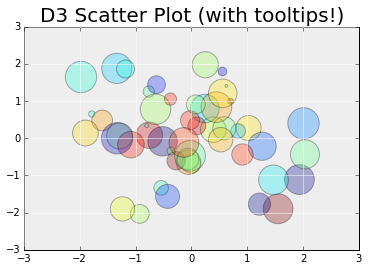

In [4]:
import matplotlib.pyplot as plt
from mpld3 import plugins, save_html
import numpy as np

fig, ax = plt.subplots(subplot_kw=dict(axisbg='#EEEEEE'))
ax.grid(color='white', linestyle='solid')

N = 50
scatter = ax.scatter(np.random.normal(size=N),
                     np.random.normal(size=N),
                     c=np.random.random(size=N),
                     s = 1000 * np.random.random(size=N),
                     alpha=0.3,
                     cmap=plt.cm.jet)

ax.set_title("D3 Scatter Plot (with tooltips!)", size=20)

labels = ['point {0}'.format(i + 1) for i in range(N)]
fig.plugins = [plugins.PointLabelTooltip(scatter, labels)]

# convertit le graphique au format HTML --> peut être inséré dans un site web
save_html(fig, "graph.html")

La méthode [save_html](http://mpld3.github.io/modules/API.html#mpld3.save_html) enregistre le graphe au format HTML. Développer localement un script en javascript n'est pas toujours évident pour quelqu'un qui débute. On n'abordera pas ce point ici.

**Solution 2 : bokeh**

On reprend l'exemple [iris](http://bokeh.pydata.org/docs/gallery/iris.html). Il faut d'abord exécuter ces deux lignes (la version 6.1 utilisée pour cet exemple perturbe un peu les notebooks.

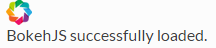

In [1]:
from bokeh.plotting import *
output_notebook()

# et cela donne
from IPython.core.display import Image
Image("grbohek0.png")

Puis le code du graphe :

In [ ]:
from bokeh.sampledata.iris import flowers
#output_file("iris.html", title="iris.py example")
colormap = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}
flowers['color'] = flowers['species'].map(lambda x: colormap[x])
scatter(flowers["petal_length"], flowers["petal_width"],
        color=flowers["color"], fill_alpha=0.2, size=10, name="iris")
xax, yax = axis()
xax.axis_label = 'Petal Length'
yax.axis_label = 'Petal Width'
curplot().title = "Iris Morphology"
show()

L'exécution donnerait :

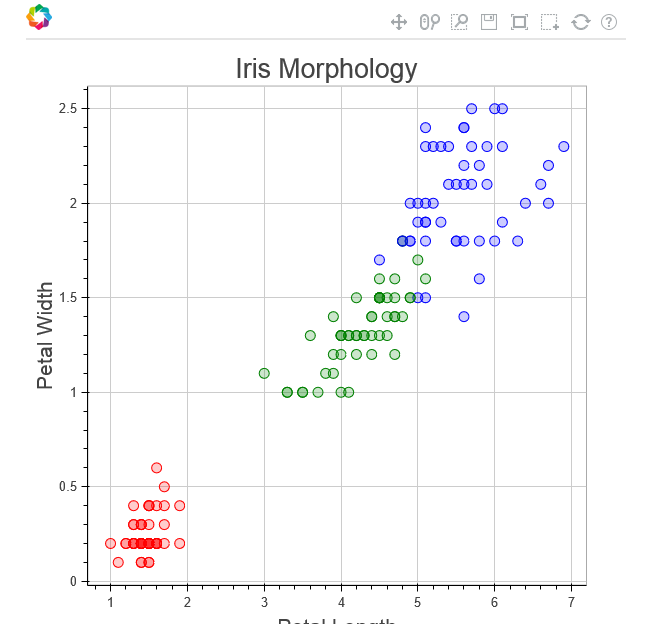

In [8]:
from IPython.core.display import Image
Image("grbohek.png")

**Solution 3 : d3.js**

Les modules précédents proposent des graphiques types. Si on veut animer de façon différentes les graphiques ou proposer des scénarios complexes, il faut revenir au framework [d3.js](http://d3js.org/).

Il y a trois parties :
* les données
* la feuille de style
* le code javascript

In [9]:
style = """
.axis path,
.axis line {
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}

.dot {
  stroke: #000;
}

.tooltip {
  position: relative;
  width: 200px;
  height: 28px;
  //pointer-events: none;
}
"""

id_graph = "mongraph"

code_graph = """
var margin = {top: 20, right: 20, bottom: 30, left: 40},
    width = 960 - margin.left - margin.right,
    height = 500 - margin.top - margin.bottom;

var xValue = function(d) { return d.Calories;}, // data -> value
    xScale = d3.scale.linear().range([0, width]), // value -> display
    xMap = function(d) { return xScale(xValue(d));}, // data -> display
    xAxis = d3.svg.axis().scale(xScale).orient("bottom");

// setup y
var yValue = function(d) { return d["Protein (g)"];}, // data -> value
    yScale = d3.scale.linear().range([height, 0]), // value -> display
    yMap = function(d) { return yScale(yValue(d));}, // data -> display
    yAxis = d3.svg.axis().scale(yScale).orient("left");

// setup fill color
var cValue = function(d) { return d.Manufacturer;},
    color = d3.scale.category10();

var svg = d3.select("#__IDGRAPH__").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var tooltip = d3.select("#__IDGRAPH__").append("div")
    .attr("class", "tooltip")
    .style("opacity", 0);

d3.csv("__FILE__", function(error, data) {

  data.forEach(function(d) {
    d.Calories = +d.Calories;
    d["Protein (g)"] = +d["Protein (g)"];
    //console.log(d);
  });

  xScale.domain([d3.min(data, xValue)-1, d3.max(data, xValue)+1]);
  yScale.domain([d3.min(data, yValue)-1, d3.max(data, yValue)+1]);

  svg.append("g")
      .attr("class", "x axis")
      .attr("transform", "translate(0," + height + ")")
      .call(xAxis)
    .append("text")
      .attr("class", "label")
      .attr("x", width)
      .attr("y", -6)
      .style("text-anchor", "end")
      .text("Calories");

  svg.append("g")
      .attr("class", "y axis")
      .call(yAxis)
    .append("text")
      .attr("class", "label")
      .attr("transform", "rotate(-90)")
      .attr("y", 6)
      .attr("dy", ".71em")
      .style("text-anchor", "end")
      .text("Protein (g)");

  // draw dots
  svg.selectAll(".dot")
      .data(data)
    .enter().append("circle")
      .attr("class", "dot")
      .attr("r", 7)                     // taille des ronds
      .attr("cx", xMap)
      .attr("cy", yMap)
      .style("fill", function(d) { return color(cValue(d));}) 
      .on("mouseover", function(d) {
          tooltip.transition()
               .duration(200)
               .style("opacity", .9);
          tooltip.html(d["Cereal Name"] + "<br/> (" + xValue(d) 
         + ", " + yValue(d) + ")")
               .style("left", (d3.event.pageX + 5) + "px")
               .style("top", (d3.event.pageY - 28) + "px");
      })
      .on("mouseout", function(d) {
          tooltip.transition()
               .duration(500)
               .style("opacity", 0);
      })
      ;

  // draw legend
  var legend = svg.selectAll(".legend")
      .data(color.domain())
    .enter().append("g")
      .attr("class", "legend")
      .attr("transform", function(d, i) { return "translate(0," + i * 20 + ")"; });

  // draw legend colored rectangles
  legend.append("rect")
      .attr("x", width - 18)
      .attr("width", 18)
      .attr("height", 18)
      .style("fill", color);

  // draw legend text
  legend.append("text")
      .attr("x", width - 24)
      .attr("y", 9)
      .attr("dy", ".35em")
      .style("text-anchor", "end")
      .text(function(d) { return d;})
});
"""

La plupart des exemples venant de la [gallerie d3.js](https://github.com/mbostock/d3/wiki/Gallery) fonctionnent à condition de bien faire attention à ces petits détails qu'il faut changer. Je vous suggère de regarder dans le code précédent à quoi correspondent ces remplacements.

In [ ]:
html_src = """
<style>
{0}
</style>
<div id="{1}"></div>
""".format(style, id_graph)

js_src = code_graph.replace("__IDGRAPH__", id_graph) \
                   .replace("__FILE__", "/notebooks/td2a/cereales.csv")
                    # ~ http://localhost:8888/notebooks/td2a/cereales.csv
 
js_libs = ['http://d3js.org/d3.v3.js']
 
import IPython
from IPython.core.display import display, Javascript, HTML
display( Javascript(data=js_src, lib= js_libs))
display(HTML(html_src))

Comme la conversion au format HTML ne fonctionne pas, voici ce que cela donnerait :

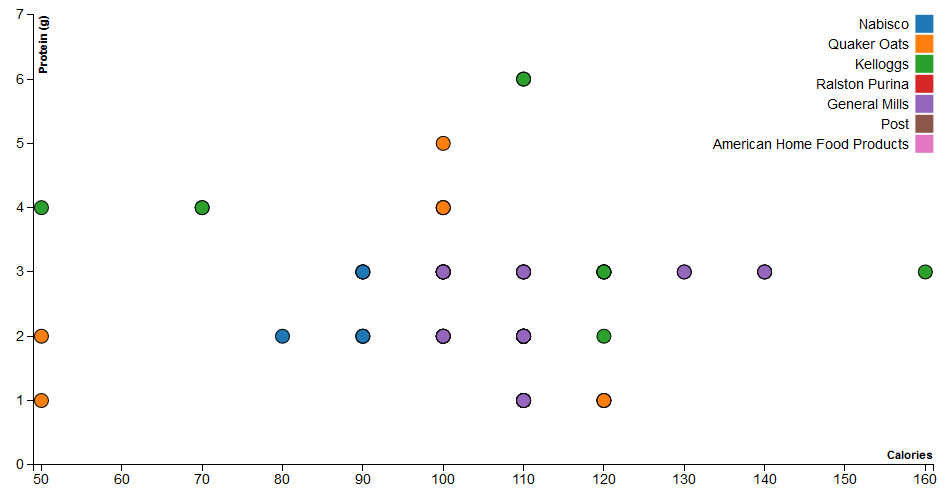

In [11]:
from pyquickhelper import NbImage
NbImage("d3jsex.png")